In [ ]:
import torch
from torch.autograd import Variable
from utee import selector
model_raw, ds_fetcher, is_imagenet = selector.select('resnet50')
ds_val = ds_fetcher(batch_size=10, train=False, val=True)
for idx, (data, target) in enumerate(ds_val):
    data =  Variable(torch.FloatTensor(data)).cuda()
    output = model_raw(data)

In [1]:
import os
import sys
os.chdir("/data/adv_geom/drg/")
from models.classifier import Classifier

In [2]:
! ls ../

datasets  drg  dumps  notebooks


In [3]:
from training.train_classifier import TrainClassifier

[1802210728] [Warning] running without display


In [4]:
%tb
args = {
    "train_images_file": "/data/adv_geom/datasets/emnist/train_images.h5",
    "train_codes_file": "/data/adv_geom/datasets/emnist/train_labels.h5",
    "test_images_file": "/data/adv_geom/datasets/emnist/test_images.h5",
    "test_codes_file": "/data/adv_geom/datasets/emnist/test_labels.h5",
    "state_file": "/data/adv_geom/dumps/emnist/classifier.pth.tar",
    "label_index": 0,
    "lr_decay": 0.95,
    "weight_decay": 0.0001,
    "training_samples": 160000,
    "validation_samples": 40000,
    "random_samples": True,
    "network_architecture": "mlp",
    "gpu_id": 1
}

sys.argv = ["-" + i + "=" + str(args[i]) if type(args[i]) != type(True) else "-" + i for i in args]


program = TrainClassifier(args=sys.argv)



No traceback available to show.
[1802210728] -- TrainClassifier
[1802210728] [Training] train_images_file=/data/adv_geom/datasets/emnist/train_images.h5
[1802210728] [Training] train_codes_file=/data/adv_geom/datasets/emnist/train_labels.h5
[1802210728] [Training] test_images_file=/data/adv_geom/datasets/emnist/test_images.h5
[1802210728] [Training] test_codes_file=/data/adv_geom/datasets/emnist/test_labels.h5
[1802210728] [Training] state_file=/data/adv_geom/dumps/emnist/classifier.pth.tar
[1802210728] [Training] log_file=/data/adv_geom/dumps/emnist/classifier.log
[1802210728] [Training] training_file=/data/adv_geom/dumps/emnist/training.h5
[1802210728] [Training] testing_file=/data/adv_geom/dumps/emnist/testing.h5
[1802210728] [Training] loss_file=/data/adv_geom/dumps/emnist/loss.png
[1802210728] [Training] error_file=/data/adv_geom/dumps/emnist/error.png
[1802210728] [Training] gradient_file=/data/adv_geom/dumps/emnist/gradient.png
[1802210728] [Training] label_index=0
[1802210728] 

In [5]:
program.load_data()

/usr/local/lib/python3.6/dist-packages/torch/distributed/distributed_c10d.py:151: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn("torch.distributed.reduce_op is deprecated, please use "
[1802210728] [Training] read /data/adv_geom/datasets/emnist/train_images.h5
[1802210728] [Training] read /data/adv_geom/datasets/emnist/test_images.h5
[1802210728] [Training] resolution 28
[1802210728] 240000
[1802210728] [Training] read /data/adv_geom/datasets/emnist/train_labels.h5
[1802210728] [Training] read /data/adv_geom/datasets/emnist/test_labels.h5
[1802210728] [Training] using 160000 training samples
[1802210728] [Training] found 10 classes
[1802210728] [Training] dataset not balanced, class 0 should have 16000 samples but has 15995
[1802210728] [Training] dataset not balanced, class 1 should have 16000 samples but has 16069
[1802210728] [Training] dataset not balanced, class 2 should have 16000 samples but has 16039
[18022

In [6]:
program.load_model_and_scheduler()

[1802210728] [Training] using 1 input channels
[1802210728] [Training] loaded /data/adv_geom/dumps/emnist/classifier.pth.tar
[1802210728] [Training] model is not CUDA
[1802210728] [Training] loaded model
[1802210728] [Training] read /data/adv_geom/dumps/emnist/training.h5
[1802210728] [Training] read /data/adv_geom/dumps/emnist/testing.h5
[1802210728] (view0, View)
(lin1, Linear)
(act1, ReLU)
(bn1, BatchNorm1d)
(lin2, Linear)
(act2, ReLU)
(bn2, BatchNorm1d)
(lin3, Linear)
(act3, ReLU)
(bn3, BatchNorm1d)
(lin4, Linear)
(act4, ReLU)
(bn4, BatchNorm1d)
(logits, Linear)



In [25]:
test_image = program.test_images[0:8]
test_codes = program.test_codes[0:8]

In [26]:
import torch

with torch.no_grad():
    program.model.cuda()
    program.model.eval()
    test_image = torch.Tensor(test_image).cuda()
    logits = program.model(test_image)
    

In [31]:
torch.max(logits, axis=1)[1]

tensor([0, 9, 7, 9, 2, 2, 3, 1], device='cuda:1')

In [32]:
test_codes

array([0, 9, 7, 9, 2, 2, 3, 1])

In [7]:
clf_report = program.test()

[1802210728] [Training] 21 set classifier to eval
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
[1802210728] [Training] 21: test 0.0860147 (0.0253)


TypeError: Image data of dtype <U8 cannot be converted to float

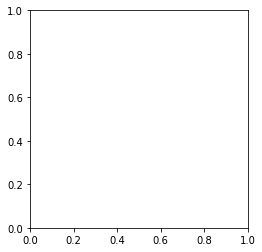

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow("test.png")

In [9]:
program.model

Classifier(
  (view0): View()
  (lin1): Linear(in_features=784, out_features=1024, bias=True)
  (act1): ReLU(inplace=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin2): Linear(in_features=1024, out_features=1024, bias=True)
  (act2): ReLU(inplace=True)
  (bn2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin3): Linear(in_features=1024, out_features=1024, bias=True)
  (act3): ReLU(inplace=True)
  (bn3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lin4): Linear(in_features=1024, out_features=1024, bias=True)
  (act4): ReLU(inplace=True)
  (bn4): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (logits): Linear(in_features=1024, out_features=10, bias=True)
)

In [13]:
print(clf_report)

{'0': {'precision': 0.9626394953905871, 'recall': 0.992, 'f1-score': 0.9770992366412214, 'support': 4000}, '1': {'precision': 0.9904690243290695, 'recall': 0.98725, 'f1-score': 0.9888568924502316, 'support': 4000}, '2': {'precision': 0.9852941176470589, 'recall': 0.9715, 'f1-score': 0.9783484390735147, 'support': 4000}, '3': {'precision': 0.9777384265115102, 'recall': 0.96625, 'f1-score': 0.9719602665660757, 'support': 4000}, '4': {'precision': 0.9449081803005008, 'recall': 0.9905, 'f1-score': 0.9671670938606127, 'support': 4000}, '5': {'precision': 0.9778393351800554, 'recall': 0.97075, 'f1-score': 0.9742817714214026, 'support': 4000}, '6': {'precision': 0.9911144960649911, 'recall': 0.976, 'f1-score': 0.9834991812570852, 'support': 4000}, '7': {'precision': 0.9646255184191266, 'recall': 0.9885, 'f1-score': 0.9764168415853809, 'support': 4000}, '8': {'precision': 0.9805277991288752, 'recall': 0.95675, 'f1-score': 0.9684929773503733, 'support': 4000}, '9': {'precision': 0.9745435844690

In [11]:
import numpy as np

In [17]:
leftover_basis = np.eye(5)

In [21]:
span = leftover_basis.copy()[2:]

In [16]:
normals = np.zeros((10, 5)) + 2 * leftover_basis[0] + 3 * leftover_basis[1]

In [25]:
normals + np.random.normal(size=(10, 5)) * np.sum(span, axis=0)

array([[ 2.        ,  3.        ,  0.93005725, -2.7010941 , -0.09077931],
       [ 2.        ,  3.        , -0.69655886,  0.26599289, -0.63374743],
       [ 2.        ,  3.        ,  0.95881895,  0.69475701, -0.20281078],
       [ 2.        ,  3.        ,  1.28920211, -1.43408625,  0.94957857],
       [ 2.        ,  3.        , -0.67751683,  0.05920811,  1.6907731 ],
       [ 2.        ,  3.        , -0.56870177, -0.61534187,  0.26821735],
       [ 2.        ,  3.        , -1.27474265, -0.64271102,  0.08352661],
       [ 2.        ,  3.        ,  1.24514789,  0.66912761, -0.47381287],
       [ 2.        ,  3.        , -1.28627607,  0.9567944 ,  0.32609812],
       [ 2.        ,  3.        ,  0.90049908, -1.8664123 ,  0.42058855]])

In [26]:
a = np.arange(10).reshape(-1, 1)
b = np.ones(10)

In [27]:
a, b

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [4]:
import os, glob




dump_dir = "/azuredrive/dumps/expC_dist_learner_for_adv_ex/dist_learner/test_MLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=100;k=2}/"
os.chdir(dump_dir)
x = None
for root, dirs, files in os.walk(dump_dir):
    if "models" in root and len(files) > 1:
        x = files
        print(root)
        best_model_fn = sorted(x, key=lambda x: int(x.split("_")[-1].split(".")[0]))[-1]
        
        if len(x) > 1:
            for j in x:
                if j != best_model_fn:
                    os.remove(os.path.join(root, j))
            print(root)
            
        
#         for file in files:
#             if file.endswith(".pth"):
#                  print(os.path.join(root, file))


/azuredrive/dumps/expC_dist_learner_for_adv_ex/dist_learner/test_MLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=100;k=2}/31052021-192633/models
/azuredrive/dumps/expC_dist_learner_for_adv_ex/dist_learner/test_MLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=100;k=2}/31052021-192633/models


In [5]:
! ls "/azuredrive/dumps/expC_dist_learner_for_adv_ex/dist_learner/test_MLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=100;k=2}/31052021-192633/models"







'test_MLPwithNormalization_model{hidden_sizes=512x4,sigmoid_last,batch_norm}_data{2spheres_in_unit_cube;n=100;k=2}_31052021-192633_val_loss_9.026023826663732e-06_epoch_499.pth'


In [7]:
phases = ["train", "val", "test"]
# data_fns = [TRAIN_FN, VAL_FN, TEST_FN]

splits = {i[0]: {"fn": i[1], "name": i[0]} for i in zip(phases, phases)}


In [8]:
splits

{'train': {'fn': 'train', 'name': 'train'},
 'val': {'fn': 'val', 'name': 'val'},
 'test': {'fn': 'test', 'name': 'test'}}